In [6]:
import image_processing as pi
import numpy as np
import copy
from PIL import Image
import matplotlib.pyplot as plt

In [7]:
# img = pi.readImage('image_processing/moon.png')
img = pi.readImage('images/moon.png')

In [8]:
img1 = pi.filterContrastLog(img)

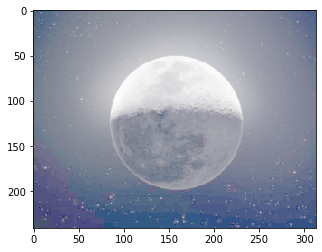

In [9]:
pi.showImage(img1)

In [27]:
''' Scaling nearest neighbor '''
r = pi.getOneChannelFromRGBMatrix(img1, 0)
w = len(r)
h = len(r[0])
g = pi.getOneChannelFromRGBMatrix(img1, 1)
b = pi.getOneChannelFromRGBMatrix(img1, 2)

In [13]:
def nearestNeighborScaling( source, newWid, newHt):
    target = new = np.zeros((newWid,newHt))
    width = w
    height = h
    for x in range(0, newWid):  
        for y in range(0, newHt):
            srcX = int( round( float(x) / float(newWid) * float(width) ) )
            srcY = int( round( float(y) / float(newHt) * float(height) ) )
            srcX = min( srcX, width-1)
            srcY = min( srcY, height-1)
            tarPix = target[x][y]
            srcColor = source[srcX][srcY]
            target[x, y] = srcColor/255

    return target 

In [14]:
new_r = nearestNeighborScaling(r, w*2, h*2)
new_g = nearestNeighborScaling(g, w*2, h*2)
new_b = nearestNeighborScaling(b, w*2, h*2)

In [15]:
new_ = pi.toRGBImage(new_r,new_g,new_b)

In [16]:
new_.max()

1.0

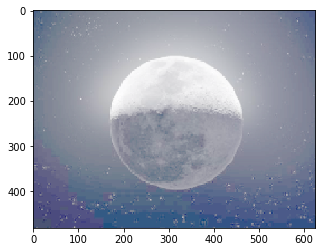

In [17]:
pi.showImage(new_)

In [18]:
''' Bilinear scaling '''
#!/bin/python
from scipy.misc import imread, imshow
from scipy import ndimage
 
def GetBilinearPixel(imArr, posX, posY):
	out = []
 
	#Get integer and fractional parts of numbers
	modXi = int(posX)
	modYi = int(posY)
	modXf = posX - modXi
	modYf = posY - modYi
	modXiPlusOneLim = min(modXi+1,imArr.shape[1]-1)
	modYiPlusOneLim = min(modYi+1,imArr.shape[0]-1)
 
	#Get pixels in four corners
	for chan in range(imArr.shape[2]):
		bl = imArr[modYi, modXi, chan]
		br = imArr[modYi, modXiPlusOneLim, chan]
		tl = imArr[modYiPlusOneLim, modXi, chan]
		tr = imArr[modYiPlusOneLim, modXiPlusOneLim, chan]
 
		#Calculate interpolation
		b = modXf * br + (1. - modXf) * bl
		t = modXf * tr + (1. - modXf) * tl
		pxf = modYf * t + (1. - modYf) * b
		out.append(int(pxf+0.5))
 
	return out

In [19]:
conda install -c anaconda scipy=1.2.1

Solving environment: | ^C
failed

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [25]:
im = imread("images/moon.png", mode="RGB")
enlargedShape = list(map(int, [im.shape[0]*2, im.shape[1]*2, im.shape[2]]))
enlargedImg = np.empty(enlargedShape, dtype=np.uint8)
rowScale = float(im.shape[0]) / float(enlargedImg.shape[0])
colScale = float(im.shape[1]) / float(enlargedImg.shape[1])
 
for r in range(enlargedImg.shape[0]):
	for c in range(enlargedImg.shape[1]):
		orir = r * rowScale #Find position in original image
		oric = c * colScale
		enlargedImg[r, c] = GetBilinearPixel(im, oric, orir)

/home/jupyter/miniconda3/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


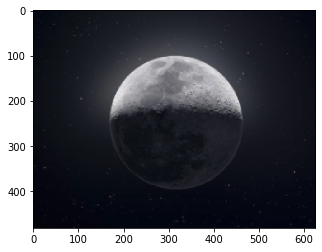

In [26]:
pi.showImage(enlargedImg)